In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2018 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# XArray Projection Handling

Use MetPy's XArray accessors to simplify opening a data file and plotting
data on a map using CartoPy.

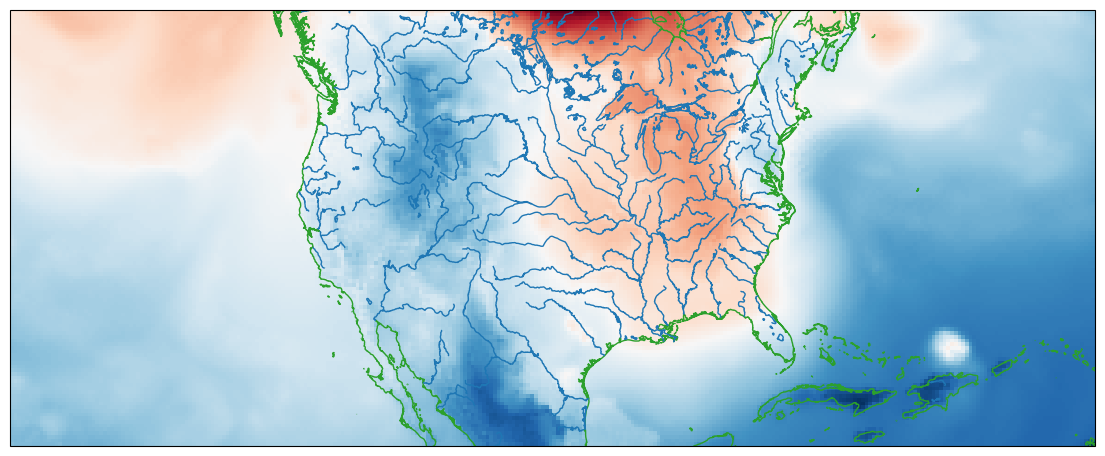

In [3]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

# Any import of metpy will activate the accessors
from metpy.cbook import get_test_data

ds = xr.open_dataset(get_test_data('narr_example.nc', as_file_obj=False))
data_var = ds.metpy.parse_cf('Temperature')

x = data_var.x
y = data_var.y
im_data = data_var.isel(time=0).sel(isobaric=1000.)

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1, projection=data_var.metpy.cartopy_crs)

ax.imshow(im_data, extent=(x.min(), x.max(), y.min(), y.max()),
          cmap='RdBu', origin='lower' if y[0] < y[-1] else 'upper')
ax.coastlines(color='tab:green', resolution='10m')
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')

plt.show()